<a href="https://colab.research.google.com/github/umesh03B/ma22c048_2023_PL/blob/main/Assignment/Assignment_14/Latent_Semantic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
c = {'May31':
'Two crises convulse a nation: a pandemic and police violence',
'May30a':
'Nation’s first astronaut launch to orbit from home soil in nearly a decade',
'May30b':
'Death of George Floyd at the hands of police set off protests',
'May27':
'SpaceX launch of NASA astronauts is postponed over weather'}

In [2]:
# !pip install spacy
import spacy
from spacy import displacy
# Install dataset: python3 -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [3]:
# -m spacy download en_core_web_sm

In [4]:
doc0 = nlp('Two crises convulse a nation')

In [5]:
svg = displacy.render(doc0, style="dep", jupyter=False)
# with open('../figs/sentence0.svg', 'w') as f: f.write(svg)

In [6]:
doc1 = nlp('SpaceX launch of NASA astronauts is postponed over weather')
displacy.render(doc1, style='ent', jupyter=True, options={'distance':90})

In [7]:
[w.lemma_ for w in doc1 if not w.is_stop]

['SpaceX', 'launch', 'NASA', 'astronaut', 'postpone', 'weather']

In [8]:
from spacy.lang.en.stop_words import STOP_WORDS

In [9]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [10]:
import pandas as pd
from scipy.sparse import lil_matrix
d = {}
for j, dok in enumerate(c.keys()):
  tokens = [w.lemma_ for w in nlp(c[dok])
      if not w.is_stop and w.pos_ != 'PUNCT']
  for t in tokens:
    d[t] = d.setdefault(t, [])
    d[t] += [j]
A = lil_matrix((len(d.keys()), len(c.keys())), dtype=int)
for i, t in enumerate(d.keys()):
    for j in d[t]:
      A[i, j] = 1
Adf = pd.DataFrame(A.toarray(), index=d.keys(), columns=c.keys()); Adf

,May31,May30a,May30b,May27
crisis,1,0,0,0
convulse,1,0,0,0
nation,1,1,0,0
pandemic,1,0,0,0
police,1,0,1,0
violence,1,0,0,0
astronaut,0,1,0,1
launch,0,1,0,1
orbit,0,1,0,0
home,0,1,0,0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set();
from numpy.linalg import norm
from scipy.linalg import svd

In [12]:
u, s, vt = svd(A.toarray())

In [13]:
k = 2 # Limit to rank k
Vt = vt[:k, :]
pd.DataFrame(Vt, columns=c.keys()) # Documents as k-vectors

,May31,May30a,May30b,May27
0,0.269907,0.829243,0.109002,0.477101
1,0.458490,-0.149538,0.854138,-0.194611


In [14]:
US = u[:, :k] @ np.diag(s[:k])
usp = pd.DataFrame(US, index=d.keys()) # Words as k-vectors
usp.head()

,0,1
crisis,0.269907,0.458490
convulse,0.269907,0.458490
nation,1.099150,0.308952
pandemic,0.269907,0.458490
police,0.378909,1.312628


In [15]:
astronaut = usp.loc['astronaut', :].to_numpy()
crisis = usp.loc['crisis', :].to_numpy()
police = usp.loc['police', :].to_numpy()

In [16]:
crisis.dot(police) / norm(police) / norm(crisis)

0.9686558216875333

In [17]:
crisis.dot(astronaut) / norm(astronaut) / norm(crisis)

0.27103529721595343

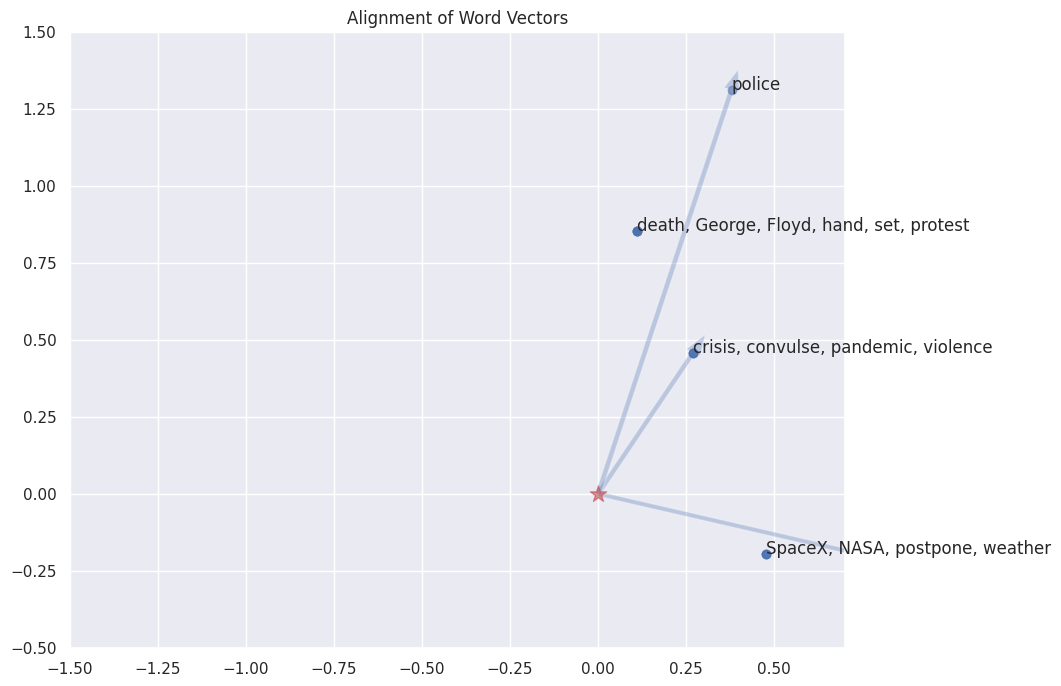

In [18]:
w = {}; us = np.round(US, 8) # w[(x,y)] = list of words at that point
usr = list(set([tuple(us[i, :]) for i in range(us.shape[0])]))
for i in range(len(usr)):
  w[usr[i]] = []
  for j in range(usp.shape[0]):
    if norm(usp.iloc[j, :] - usr[i]) < 1e-6:
      w[usr[i]] += [usp.index[j]]
fig = plt.figure(figsize=(10, 8)); ax = fig.gca()
ax.arrow(0, 0, crisis[0], crisis[1], width=0.015, alpha=0.3)
ax.arrow(0, 0, police[0], police[1], width=0.015, alpha=0.3)
ax.arrow(0, 0, astronaut[0], astronaut[1], width=0.015, alpha=0.3)
ax.scatter(US[: , 0], US[: ,1], alpha=0.5)
ax.scatter(0, 0, color='r', marker='*', s=150, alpha=0.6);
for i, key in enumerate(w.keys()):
  ax.annotate(', '.join(w[key]), (key[0], key[1]))
ax.set_xlim((-1.5, 0.7)); ax.set_ylim((-0.5, 1.5));
ax.set_title('Alignment of Word Vectors');

In [19]:
c.update(
{
'May30Launch':
'Go NASA! Go SpaceX! Godspeed, Bob and Doug!',
'NYTimes':
'NASA and SpaceX officials more often than not ' +
'just call the pilots of this historic mission Bob and Doug.',
'May30NASAblog':
'The first stage of the SpaceX rocket has landed ' +
'successfully on the droneship, Of Course I Still Love You.',
'May31NYTimes':
'After a 19 hour trip, NASA astronauts Bob and Doug ' +
'successfully docked their capsule and entered the space station.',
})

In [20]:
c.update(
{
'2015Musk':
'West Coast droneship under construction will ' +
'be named Of Course I Still Love You',
'IainBanks':
'These friends of yours are ships. ' +
'Yes, both of them. ' +
'What are they called? ' +
'Of Course I Still Love You and Just Read The Instructions. ' +
'They are not warships? ' +
'With names like that?'
})

In [21]:
from spacy.matcher import PhraseMatcher
terms = ['SpaceX',
'Of Course I Still Love You',
'Just Read The Instructions']
patterns = [nlp.make_doc(text) for text in terms]
matcher = PhraseMatcher(nlp.vocab)
matcher.add('TerminologyList', None, *patterns)

In [22]:
from spacy.tokens import Span
def tokensfromdoc(doc):
  d = nlp(doc)
  matches = matcher(d)
  for match_id, start, end in matches:
    term = Span(d, start, end, label='myterms')
    d.ents = list(d.ents) + [term]
  tokens = [w.lemma_ for w in d
            # no pronouns
            if w.pos_ != 'PRON' \
            # no punctuations
            and w.pos_ != 'PUNCT' \
            # not Beginning of a named entity
            and w.ent_iob_ != 'B' \
            # not Inside a named entity
            and w.ent_iob_ != 'I' \
            # not a stop word
            and not w.is_stop]
  tokens += [de.text.rstrip().replace(' ', '_') for de in d.ents]

  return tokens
def dictokens(corpora):
  d = {}
  for j, dok in enumerate(corpora.keys()):
    for t in tokensfromdoc(corpora[dok]):
      d[t] = d.setdefault(t, [])
      d[t] += [j]
  return d

In [23]:
def tdmatrix(d, corpora):
  A = lil_matrix((len(d.keys()), len(corpora.keys())), dtype=int)
  for i, t in enumerate(d.keys()):
    for j in d[t]:
      A[i, j] = 1
  return A

In [24]:

d = dictokens(c)
A = tdmatrix(d, c)
Adf = pd.DataFrame(A.toarray(), index=d.keys(), columns=c.keys())

In [25]:
Adf.loc[['Of_Course_I_Still_Love_You'], 'NYTimes':].T

,Of_Course_I_Still_Love_You
NYTimes,0
May30NASAblog,1
May31NYTimes,0
2015Musk,1
IainBanks,1


from matplotlib import pyplot as plt
_df_0['Of_Course_I_Still_Love_You'].plot(kind='hist', bins=20, title='Of_Course_I_Still_Love_You')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Of_Course_I_Still_Love_You'].plot(kind='line', figsize=(8, 4), title='Of_Course_I_Still_Love_You')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
def retrieve(querytokns, W, Vt, c):
  """Given a list of query word token numbers "querytokns",
  all words vectors "W" and all document vectors "Vt.T"
  extracted from a corpus c, retrieve the documents
  relevant to the query. """
  q = W[querytokns, :].mean(axis=0)
  nrm = norm(q)
  q /= nrm
  idx = np.argsort(Vt.T @ q)[::-1]
  kl = list(c.keys())
  keys = [kl[i] for i in idx]
  docs = [c[k] for k in keys]
  return docs, keys, idx

In [27]:
uu, ss, vvt = svd(A.toarray()) # SVD & rank k approximation
k = 4
U = uu[:, :k]; S = ss[:k];
Vt = vvt[:k, :] # Document vectors
W = uu[:, :k] @ np.diag(ss[:k]) # Word vectors

In [28]:
myquery = np.where((Adf.index=='astronaut') | (Adf.index=='first'))[0]
docs, keys, idx = retrieve(myquery, W, Vt, c)
docs[:3]

['Nation’s first astronaut launch to orbit from home soil in nearly a decade',
 'SpaceX launch of NASA astronauts is postponed over weather',
 'The first stage of the SpaceX rocket has landed successfully on the droneship, Of Course I Still Love You.']

In [29]:
myquery = np.where(Adf.index=='droneship')[0]
docs, keys, idx = retrieve(myquery, W, Vt, c)
docs[:3]

['The first stage of the SpaceX rocket has landed successfully on the droneship, Of Course I Still Love You.',
 'These friends of yours are ships. Yes, both of them. What are they called? Of Course I Still Love You and Just Read The Instructions. They are not warships? With names like that?',
 'West Coast droneship under construction will be named Of Course I Still Love You']